# Visualization


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import warnings

warnings.filterwarnings("ignore")
sns.set_style("white")


## Loading data


In [12]:
df = pd.read_csv("netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


## Data Visualization


### Movies vs TV Shows

As we can see below, movies have a more expressive amount of attractions in Netflix.


Text(0.5, 0, '')

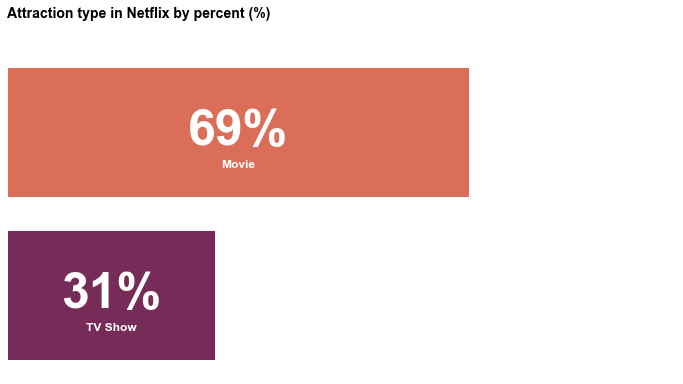

In [14]:
types_df = df.groupby(["type"]).size().reset_index(name="counts")
types_df["percent"] = round(types_df["counts"] / sum(types_df["counts"]), 2) * 100
plt.figure(figsize=(12, 6))
g = sns.barplot(x="percent", y="type", palette="rocket_r", data=types_df, orient="h")

g.text(
    0,
    -0.7,
    "Attraction type in Netflix by percent (%)",
    fontsize=14,
    fontweight="bold",
    color="black",
)

col = "percent"
for i in range(2):
    g.annotate(
        f"{int(types_df[col][i])}%",
        xy=(types_df[col][i] / 2, i),
        ha="center",
        va="center",
        fontsize=50,
        fontweight="bold",
        color="white",
    )
    g.annotate(
        "Movie" if i == 0 else "TV Show",
        xy=(types_df[col][i] / 2, i + 0.2),
        ha="center",
        va="center",
        fontsize=12,
        fontweight="bold",
        color="white",
    )

for i in ["top", "left", "right", "bottom"]:
    g.spines[i].set_visible(False)

g.set_xlim(0, 100)
g.set(xticklabels=[], yticklabels=[])
plt.ylabel("")
plt.xlabel("")


### Attractions ratings

We can also see the difference between the ratings of each one!


Text(0, 0.5, '')

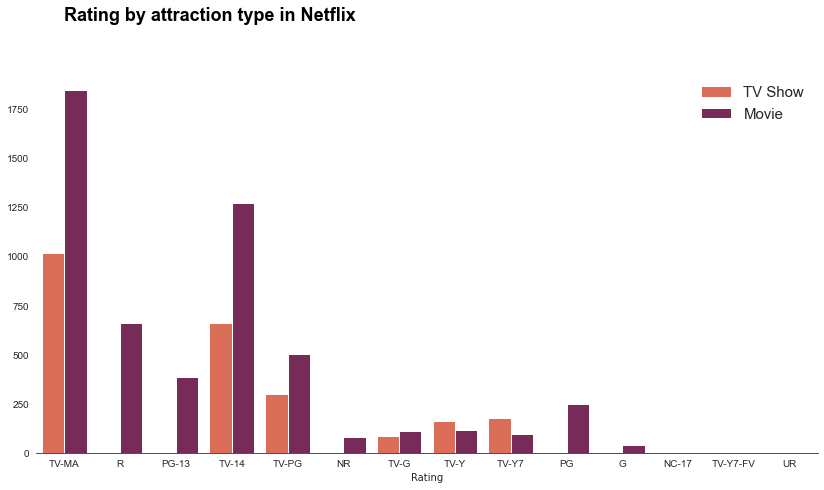

In [15]:
plt.figure(figsize=(14, 7))
g = sns.countplot(df["rating"], hue=df["type"], palette="rocket_r")
g.text(
    0,
    2200,
    "Rating by attraction type in Netflix",
    fontsize=18,
    fontweight="bold",
    color="black",
)

for i in ["top", "left", "right"]:
    g.spines[i].set_visible(False)

plt.legend(loc="upper right", frameon=False, prop={"size": 15})
plt.xlabel("Rating", fontfamily="Fira Sans")
plt.ylabel("")


### Movies and TV Shows production


Text(0, 0.5, '')

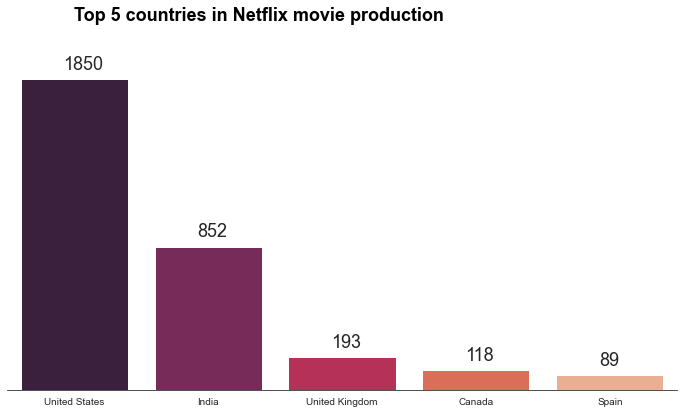

In [16]:
movies_df = df[df["type"] == "Movie"]
top5countries_movies = (
    movies_df.groupby(["country"]).size().sort_values(ascending=False)[0:5]
)

plt.figure(figsize=(12, 6))
g = sns.barplot(x=top5countries_movies.index, y=top5countries_movies, palette="rocket")
g.text(
    0,
    2200,
    "Top 5 countries in Netflix movie production",
    fontsize=18,
    fontweight="bold",
    color="black",
)

for i in ["top", "left", "right"]:
    g.spines[i].set_visible(False)

for i in g.patches:
    g.text(
        i.get_x() + i.get_width() / 2.5,
        i.get_height() + 60,
        round(i.get_height()),
        fontsize="18",
    )

g.set(yticklabels=[])
plt.xlabel("")
plt.ylabel("")


Looking at the top 5 countries again, but for TV Shows, in the chart below we can notice USA still leads the productions!


Text(0, 0.5, '')

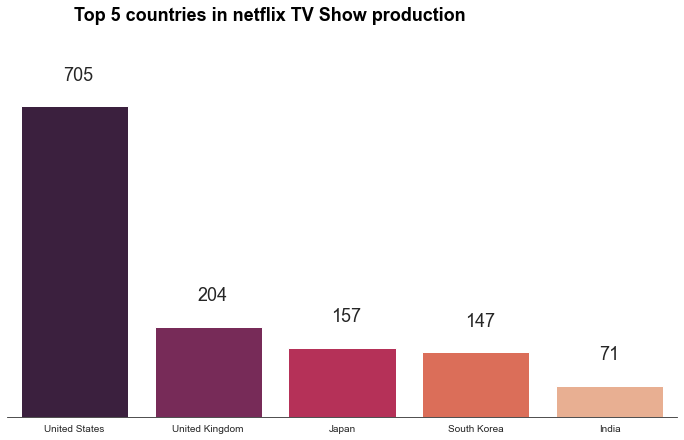

In [17]:
tvshows_df = df[df["type"] == "TV Show"]
top5countries_tvshows = (
    tvshows_df.groupby(["country"]).size().sort_values(ascending=False)[0:5]
)

plt.figure(figsize=(12, 6))
g = sns.barplot(
    x=top5countries_tvshows.index, y=top5countries_tvshows, palette="rocket"
)
g.text(
    0,
    900,
    "Top 5 countries in netflix TV Show production",
    fontsize=18,
    fontweight="bold",
    color="black",
)

for i in ["top", "left", "right"]:
    g.spines[i].set_visible(False)

for i in g.patches:
    g.text(
        i.get_x() + i.get_width() / 2.5,
        i.get_height() + 60,
        round(i.get_height()),
        fontsize="18",
    )

g.set(yticklabels=[])
plt.xlabel("")
plt.ylabel("")


The time Netflix invests more in movies or TV shows


Text(0, 0.5, '')

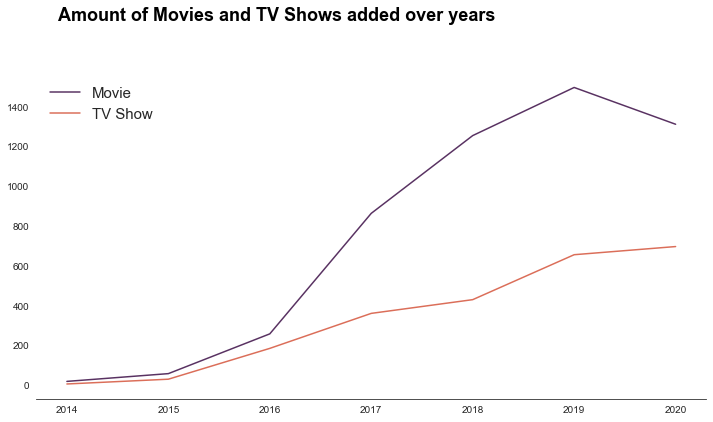

In [18]:
df["date_added"] = pd.to_datetime(df["date_added"])
df["year_added"] = df["date_added"].dt.year
index = [2014, 2015, 2016, 2017, 2018, 2019, 2020]

ts_df = df[df["year_added"] > 2013]
ts_df = (
    ts_df[ts_df["year_added"] < 2021]
    .groupby("type")["year_added"]
    .value_counts()
    .unstack()
    .T
)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.text(
    0.15,
    1,
    "Amount of Movies and TV Shows added over years",
    fontsize=18,
    fontweight="bold",
    color="black",
)

g1 = sns.lineplot(x=ts_df.index, y=ts_df["Movie"], color="#593262", label="Movie")
g2 = sns.lineplot(x=ts_df.index, y=ts_df["TV Show"], color="#db6e59", label="TV Show")


for i in ["top", "left", "right"]:
    ax.spines[i].set_visible(False)

ax.legend(loc="upper left", frameon=False, prop={"size": 15})
plt.xlabel("")
plt.ylabel("")


(0.0, 1.0)

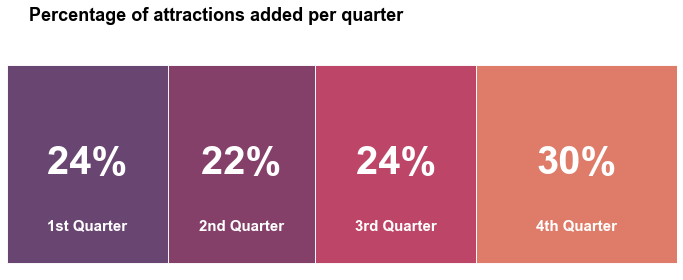

In [19]:
def quarter_expression(i):
    if i == 1:
        return "1st Quarter"
    elif i == 2:
        return "2nd Quarter"
    elif i == 3:
        return "3rd Quarter"
    else:
        return "4th Quarter"


df["quarter_added"] = df["date_added"].dt.quarter
qrt_df = df["quarter_added"].value_counts()
prct_qrt = pd.DataFrame(round(qrt_df / sum(qrt_df), 2)).T

fig, ax = plt.subplots(1, 1, figsize=(12, 4))

ax.barh(prct_qrt.index, prct_qrt[1.0], color="#593262", alpha=0.9)
ax.barh(prct_qrt.index, prct_qrt[2.0], color="#772b58", alpha=0.9, left=prct_qrt[1.0])
ax.barh(
    prct_qrt.index,
    prct_qrt[3.0],
    color="#b53158",
    alpha=0.9,
    left=prct_qrt[1.0] + prct_qrt[2.0],
)
ax.barh(
    prct_qrt.index,
    prct_qrt[4.0],
    color="#db6e59",
    alpha=0.9,
    left=prct_qrt[1.0] + prct_qrt[2.0] + prct_qrt[3.0],
)

fig.text(
    0.15,
    1,
    "Percentage of attractions added per quarter",
    fontsize=18,
    fontweight="bold",
    color="black",
)

sum_list = []
for i in range(1, 5):
    ax.annotate(
        f"{int((prct_qrt[i][prct_qrt.index])*100)}%",
        xy=(sum(sum_list) + prct_qrt[i][prct_qrt.index] / 2, prct_qrt.index),
        ha="center",
        va="center",
        fontsize=40,
        fontweight="bold",
        color="white",
    )
    ax.annotate(
        quarter_expression(i),
        xy=(sum(sum_list) + prct_qrt[i][prct_qrt.index] / 2, -0.25),
        ha="center",
        va="center",
        fontsize=15,
        fontweight="bold",
        color="white",
    )

    sum_list.append(prct_qrt[i][prct_qrt.index])

for i in ["top", "left", "right", "bottom"]:
    ax.spines[i].set_visible(False)

ax.set(yticklabels=[], xticklabels=[])
ax.set_xlim(0, 1)


# Genres


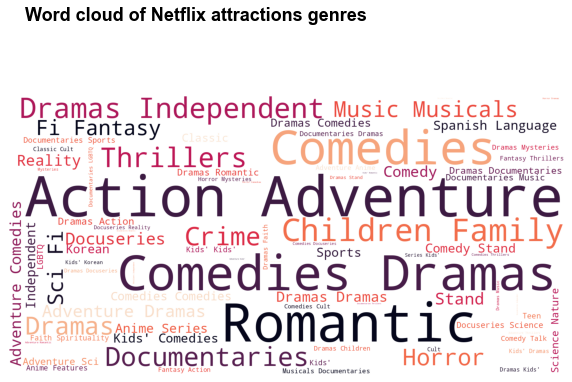

In [20]:
df["genre"] = df["listed_in"].apply(
    lambda x: x.replace(" TV", "")
    .replace("TV ", "")
    .replace(" ,", ",")
    .replace(", ", ",")
    .split(",")
)

stopwords = set(STOPWORDS)
stopwords.update(["Shows", "Movies", "British", "International"])

all_summary = " ".join(" ".join(s) for s in df["genre"])
wordcloud = WordCloud(
    stopwords=stopwords,
    background_color="white",
    colormap="rocket",
    width=1600,
    height=800,
).generate(all_summary)

fig, ax = plt.subplots(figsize=(10, 6))

fig.text(
    0.15,
    1,
    "Word cloud of Netflix attractions genres",
    fontsize=18,
    fontweight="bold",
    color="black",
)

ax.imshow(wordcloud, interpolation="bilinear")
ax.set_axis_off()

plt.imshow(wordcloud)
